In [19]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from da.l96 import gen_l96
from da.scheme import rk4, euler

In [20]:
def plot_lorenz96(result):
    result = np.array(result)

    # 摂動を加えた20番目の要素をplot
    fig1, ax1 = plt.subplots()
    ax1.plot(result[:, 19])
    ax1.set_xlabel('step')
    ax1.set_ylabel('$x_{20} $')
    plt.title('plot 20th component')

    # 1,2,3番目の要素を3次元plot
    fig2 = plt.figure()
    ax2 = fig2.add_subplot(projection='3d')
    ax2.plot(result[:, 0], result[:, 1], result[:, 2])
    ax2.set_xlabel('$x_1$')
    ax2.set_ylabel('$x_2$')
    ax2.set_zlabel('$x_3$')
    plt.title('first three components of Lorenz96')
    
    # Hovmoller Diagram
    day = 50
    Z = result[180*20:180*20 + day*20, :]
    
    fig3, ax3 = plt.subplots(figsize=(5,5))
    ax3.grid(False)
    ax3.set_xlabel('space')
    ax3.set_ylabel('time(day)')
    ax3.set_xticks(np.arange(0,40,5))
    ax3.set_yticks(np.arange(0, day*20, 20*5))
    ax3.set_yticklabels(np.arange(180, 180+ day, 5))
    im = ax3.imshow(Z, aspect=40/(day*20), extent=[0, 40, 0, day*20], vmax=Z.max(), vmin=Z.min(), origin="lower")
    plt.colorbar(im)
    ax3.set_title('Hovmollor diagram')

    fig4, ax4 = plt.subplots()
    ax4.plot(result[-1])
    ax4.set_xlabel('$k$')
    ax4.set_ylabel('$x_k$')
    
    plt.show()

 # Lorenz96の計算

In [21]:
# J: 変数の数
J = 40

# dt: 時間刻み
dt = 0.01

# N: 時間ステップ数
# 2年分に相当
N = 360*20*2


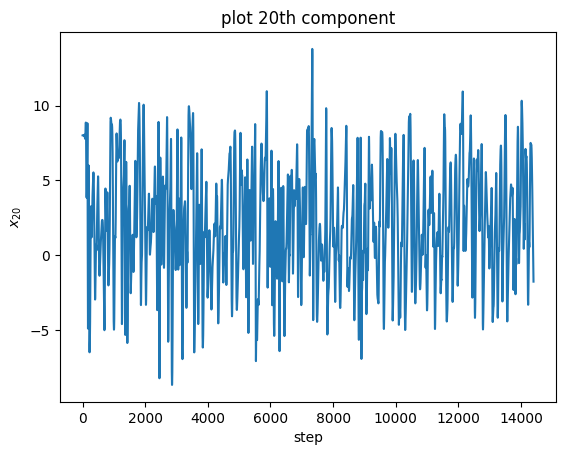

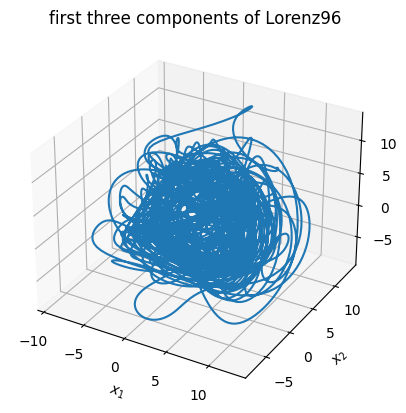

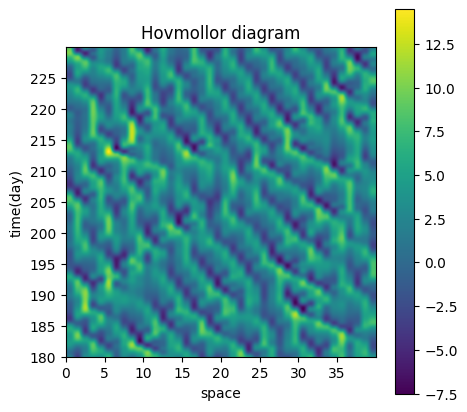

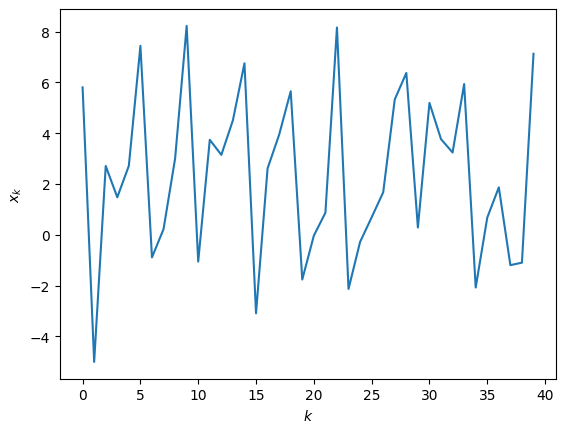

(14400, 40)
(1440, 40)


In [22]:
# 外力
F = 8

# 初期値の設定(摂動を加える)
x0 = F*np.ones(J)
x0[19] *= 1.001

lorenz = gen_l96(F)
# 任意のスキームでLorenz96を計算，plotする．
# 引数: scheme(f, t, x, dt) -> x(t+dt)
def simulate_lorenz96(x0, dt, N, scheme, plot=True):
    result = np.zeros((N,len(x0)))
    x = x0
    result[0] = x[:]

    for n in range(1,N):
        t = n*dt
        x = scheme(lorenz, t, x, dt)
        result[n] = x[:]
        
#  plot
    if plot:
        plot_lorenz96(result)

    return result

scheme_name = "rk4"
scheme = euler if scheme_name=="euler" else rk4

x = simulate_lorenz96(x0, dt, N, scheme)
print(x.shape)

x_true = x[360*20:][::5] # 1年分を捨て，6h毎に取り出す
print(x_true.shape)

np.save(f"x_true_l96{scheme_name if scheme_name=='_euler' else ''}", x_true)

## 観測

In [23]:
x_true = np.load("x_true_l96.npy")
np.random.seed(0)
noise = np.random.normal(loc=0, scale=1, size=x_true.shape) # R = I
x_obs = x_true + noise
print(x_obs.shape)

np.save("x_obs_l96", x_obs)

(1440, 40)


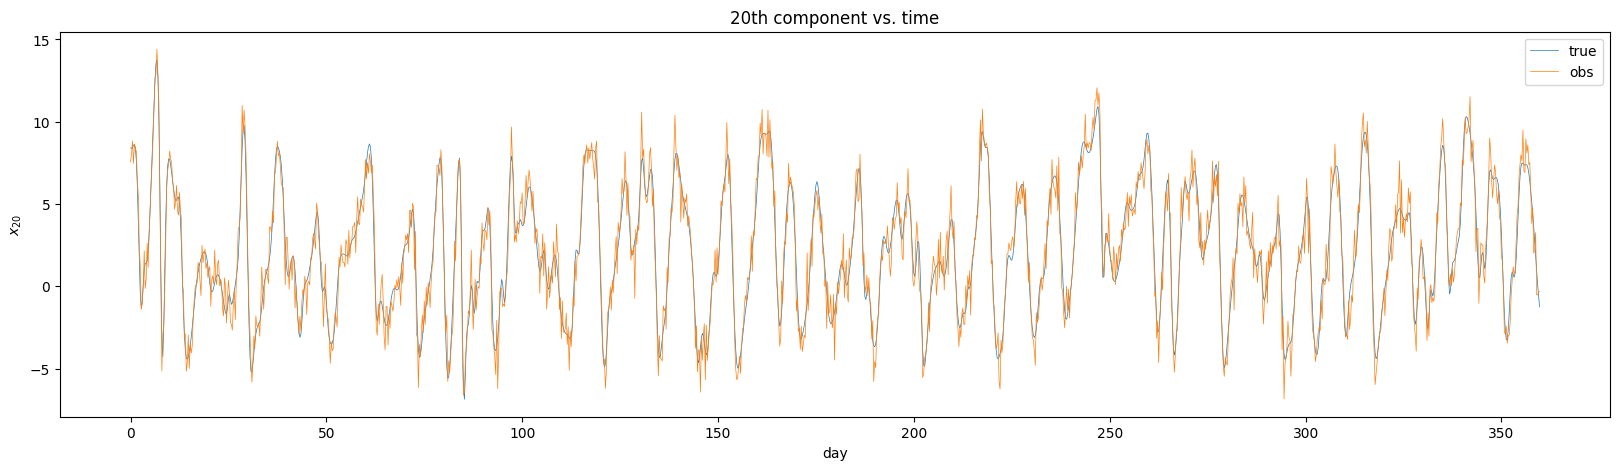

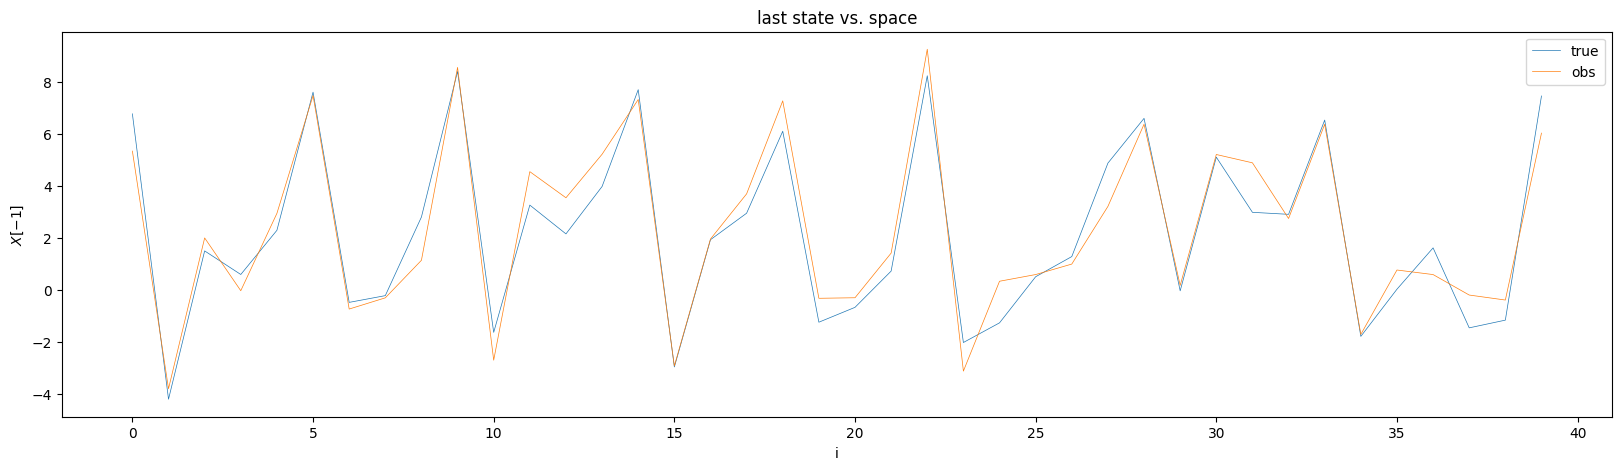

In [24]:
dates = [time/4 for time in range(1440)]
fig1, ax1 = plt.subplots(figsize=(20,5))
ax1.plot(dates, x_true[:, 19], '-', label='true', lw=0.5)
ax1.plot(dates, x_obs[:, 19],'-', label='obs', lw=0.5)
ax1.set_xlabel('day')
ax1.set_ylabel('$x_{20} $')
plt.title('20th component vs. time')
_ = plt.legend()

fig2, ax2 = plt.subplots(figsize=(20,5))
ax2.plot(x_true[-1, :], '-', label='true', lw=0.5)
ax2.plot(x_obs[-1, :],'-', label='obs', lw=0.5)
ax2.set_xlabel('i')
ax2.set_ylabel('$ X[-1] $')
plt.title('last state vs. space')
_ = plt.legend()

